<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Mean Squared Error: 483.56


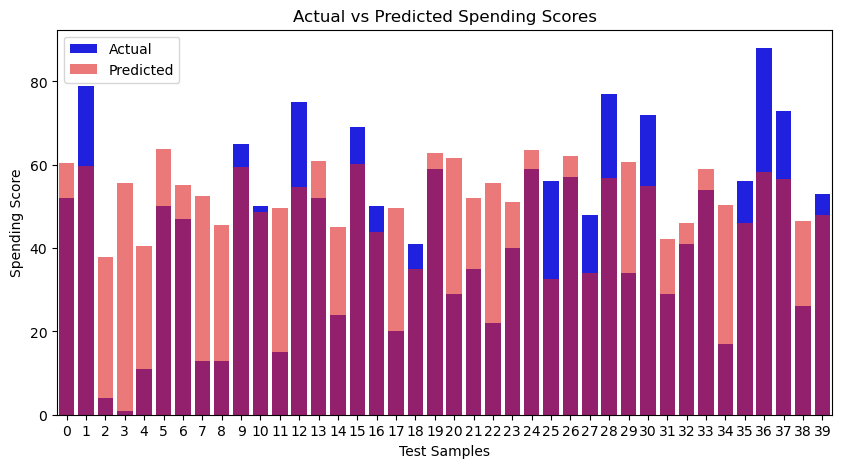

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

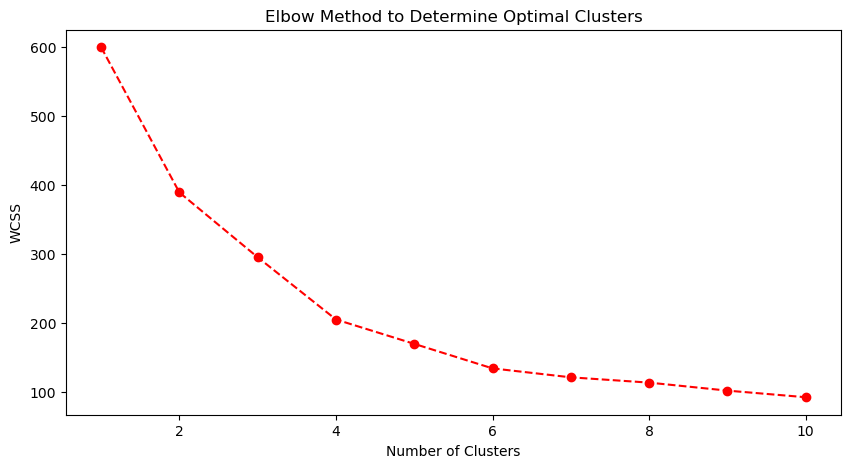

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


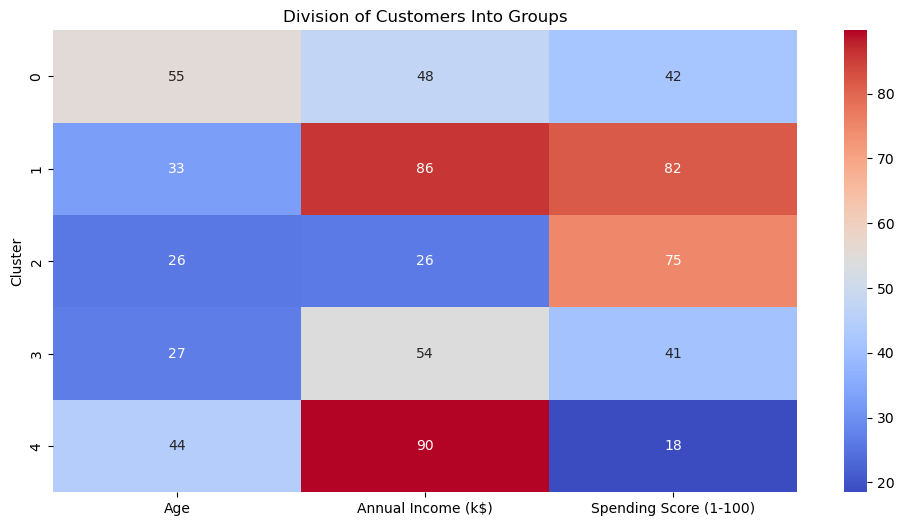

In [10]:
import pandas as pd  # Import pandas for data handling
import numpy as np  # Import numpy for numerical operations
import seaborn as sns  # Seaborn for visualization
import matplotlib.pyplot as plt  # Matplotlib for plots
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.linear_model import LinearRegression  # Regression model
from sklearn.metrics import mean_squared_error  # Evaluating model
from sklearn.cluster import KMeans  # K-Means clustering
from sklearn.preprocessing import StandardScaler  # Scaling data

# Load dataset
data = pd.read_csv('Mall_Customers.csv')  # Load the dataset

# Display basic info
data.info()

# Step 1: Predicting Spending Score (Supervised Learning - Regression)
# Selecting features (Age, Annual Income) and target variable (Spending Score)
X = data[['Age', 'Annual Income (k$)']]  # Independent variables
y = data['Spending Score (1-100)']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

# Predicting Spending Score
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)  # Compute Mean Squared Error
print(f'Mean Squared Error: {mse:.2f}')

# Visualization: Regression Model Results (Using Bar Plot)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(y_test)), y=y_test, color='blue', label='Actual')
sns.barplot(x=np.arange(len(y_pred)), y=y_pred, color='red', alpha=0.6, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Spending Scores')
plt.xlabel('Test Samples')
plt.ylabel('Spending Score')
plt.savefig("static/plot_1.png")
plt.show()

# Step 2: Dividing Customers into Groups (Unsupervised Learning - Clustering)
X_cluster = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Features for clustering
scaler = StandardScaler()  # Scaling data for better clustering
X_scaled = scaler.fit_transform(X_cluster)  # Standardize the features

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # List to store Within-Cluster-Sum-of-Squares
for i in range(1, 11):  # Testing clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method to find the best k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.savefig("static/plot_2.png")
plt.show()

# Applying K-Means with the optimal number of clusters (assuming 5 from the Elbow Method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters

# Visualization: Cluster Distribution using a Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.pivot_table(index='Cluster', values=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], aggfunc='mean'), annot=True, cmap='coolwarm')
plt.title('Division of Customers Into Groups') #Average Feature Values per Cluster
plt.savefig("static/plot_3.png")
plt.show()



